Step 1: Load the SWaT Dataset

In [1]:
import pandas as pd

file_path = '/content/drive/MyDrive/Dec2019.xlsx'

# Load the Excel file
data = pd.ExcelFile(file_path)

# Parse the specific sheet
df = data.parse(sheet_name='Dec2019')

print(df.head())


              t_stamp  P1_STATE   LIT101.Pv  FIT101.Pv  MV101.Status  \
0 2019-12-06 10:05:00         3  658.661255        0.0             1   
1 2019-12-06 10:05:01         3  659.171600        0.0             1   
2 2019-12-06 10:05:02         3  659.681800        0.0             1   
3 2019-12-06 10:05:03         3  660.349100        0.0             1   
4 2019-12-06 10:05:04         3  660.780945        0.0             1   

   P101.Status  P102.Status  P2_STATE  FIT201.Pv  AIT201.Pv  ...  FIT601.Pv  \
0          2.0            1         2   2.313523   35.21533  ...   0.000256   
1          2.0            1         2   2.311857   35.21533  ...   0.000256   
2          2.0            1         2   2.311601   35.21533  ...   0.000256   
3          2.0            1         2   2.310448   35.21533  ...   0.000256   
4          2.0            1         2   2.310448   35.21533  ...   0.000256   

   P601.Status  P602.Status  P603.Status  LSH601.Alarm  LSL601.Alarm  \
0            2      

Step 2: Exploratory Data Analysis (EDA)

Check basic structure:

In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13201 entries, 0 to 13200
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   t_stamp        13201 non-null  datetime64[ns]
 1   P1_STATE       13201 non-null  int64         
 2   LIT101.Pv      13201 non-null  float64       
 3   FIT101.Pv      13201 non-null  float64       
 4   MV101.Status   13201 non-null  int64         
 5   P101.Status    13200 non-null  float64       
 6   P102.Status    13201 non-null  int64         
 7   P2_STATE       13201 non-null  int64         
 8   FIT201.Pv      13201 non-null  float64       
 9   AIT201.Pv      13201 non-null  float64       
 10  AIT202.Pv      13201 non-null  float64       
 11  AIT203.Pv      13201 non-null  float64       
 12  MV201.Status   13201 non-null  int64         
 13  P201.Status    13201 non-null  int64         
 14  P202.Status    13201 non-null  int64         
 15  P203.Status    1320

Summary statistics:

In [3]:
df.describe()


,t_stamp,P1_STATE,LIT101.Pv,FIT101.Pv,MV101.Status,P101.Status,P102.Status,P2_STATE,FIT201.Pv,AIT201.Pv,...,P502.Status,MV501.Status,MV502.Status,MV503.Status,MV504.Status,P6_STATE,FIT601.Pv,P601.Status,P602.Status,P603.Status
count,13201,13201.000000,13201.000000,13201.000000,13201.000000,13200.000000,13201.0,13201.0,13201.000000,13201.000000,...,13201.0,13201.0,13201.0,13201.0,13201.0,13201.0,13201.000000,13201.000000,13201.000000,13201.0
mean,2019-12-06 11:55:00,2.562230,746.631882,0.504457,1.069692,1.625000,1.0,2.0,1.455125,42.058712,...,1.0,2.0,2.0,1.0,1.0,2.0,0.013764,1.300129,1.007121,1.0
min,2019-12-06 10:05:00,2.000000,490.031433,0.000000,0.000000,1.000000,1.0,2.0,0.000000,23.519610,...,1.0,2.0,2.0,1.0,1.0,2.0,0.000000,1.000000,1.000000,1.0
25%,2019-12-06 11:00:00,2.000000,719.699341,0.000000,1.000000,1.000000,1.0,2.0,0.000256,31.562420,...,1.0,2.0,2.0,1.0,1.0,2.0,0.000256,1.000000,1.000000,1.0
50%,2019-12-06 11:55:00,3.000000,773.004600,0.000000,1.000000,2.000000,1.0,2.0,2.321981,41.303513,...,1.0,2.0,2.0,1.0,1.0,2.0,0.000256,1.000000,1.000000,1.0
75%,2019-12-06 12:50:00,3.000000,801.855347,0.000000,1.000000,2.000000,1.0,2.0,2.330824,50.243527,...,1.0,2.0,2.0,1.0,1.0,2.0,0.000320,2.000000,1.000000,1.0
max,2019-12-06 13:45:00,3.000000,833.532300,4.392275,2.000000,2.000000,1.0,2.0,2.352481,82.671110,...,1.0,2.0,2.0,1.0,1.0,2.0,1.814500,2.000000,2.000000,1.0
std,NaN,0.496131,81.070112,1.272004,0.269944,0.484141,0.0,0.0,1.123655,12.744509,...,0.0,0.0,0.0,0.0,0.0,0.0,0.147622,0.458331,0.084086,0.0


Check for missing values:

In [4]:
df.isnull().sum()


,0
t_stamp,0
P1_STATE,0
LIT101.Pv,0
FIT101.Pv,0
MV101.Status,0
...,...
LSL601.Alarm,0
LSH602.Alarm,0
LSL602.Alarm,0
LSH603.Alarm,0


Visualize data distributions:

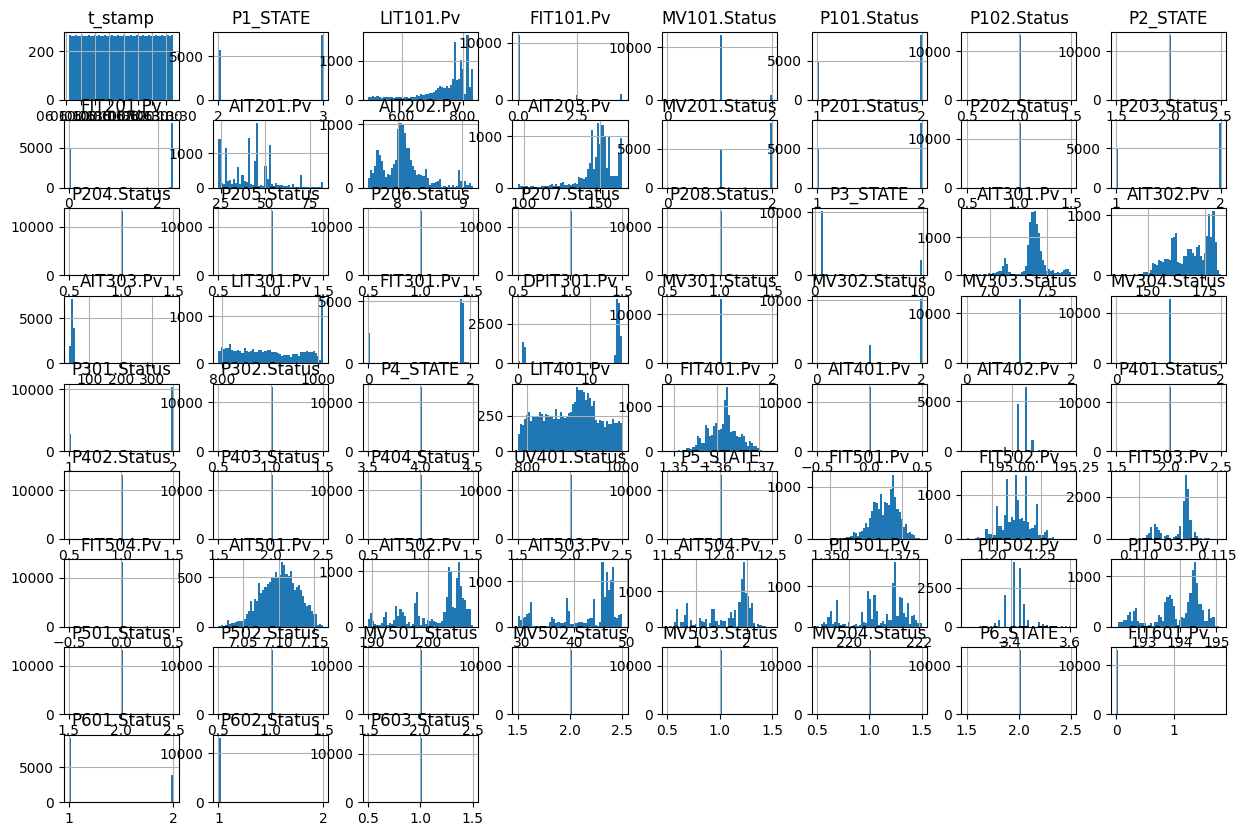

In [5]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(15, 10))
plt.show()


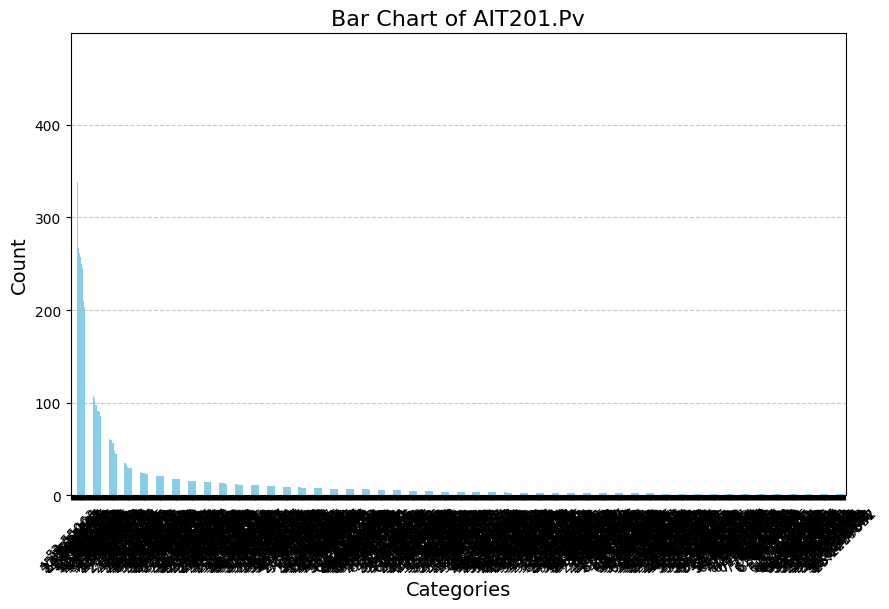

In [9]:
import matplotlib.pyplot as plt
column_name = 'AIT201.Pv'

# Count the occurrences of unique values in the column
value_counts = df[column_name].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')

plt.title(f"Bar Chart of {column_name}", fontsize=16)
plt.xlabel('Categories', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
